In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import to_datetime

In [19]:
df = pd.read_csv('AirPassengers.csv')

print(df.shape)

(144, 2)


In [20]:
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


In [22]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

Prophet also imposes the strict condition that the input columns must be named as ds (the time column) and y (the metric column).

In [23]:
df = df.rename(columns={'Month': 'ds',
                        '#Passengers': 'y'})
df.head(10)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


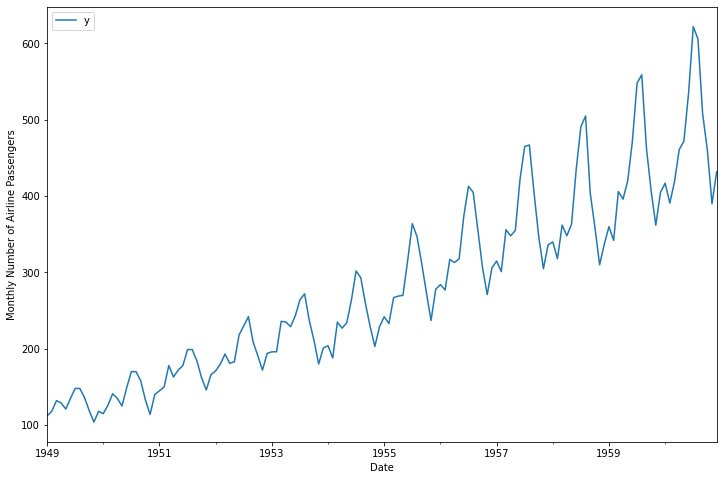

In [24]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

## Time Series Forecasting with Prophet

In [25]:
from fbprophet import Prophet

# set the uncertainty interval to 95% (the Prophet default is 80%)
model = Prophet(interval_width=0.95)

# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       401.676    0.00248047       124.072           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       401.794   6.53748e-05       58.9607   1.051e-06       0.001      209  LS failed, Hessian reset 
     199       401.842   7.96656e-05       76.5629           1           1      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       401.847   9.58429e-06       62.8741   1.173e-07       0.001      341  LS failed, Hessian reset 
     299       401.875   0.000423503       97.4976           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       401.939   0.000255806       95.7883   2.552e-06       0.001      496  LS failed, Hessian rese

In [26]:
future_dates = model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [27]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.713914,607.471098,692.746769
176,1963-09-01,603.461648,557.070438,650.286110
177,1963-10-01,567.230030,523.440023,612.055854
178,1963-11-01,535.404764,491.339395,578.667322
179,1963-12-01,565.026903,520.065562,609.786996


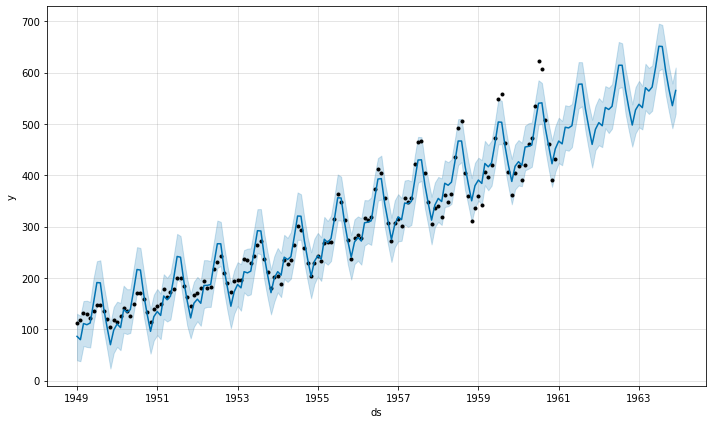

In [28]:
model.plot(forecast, uncertainty=True);

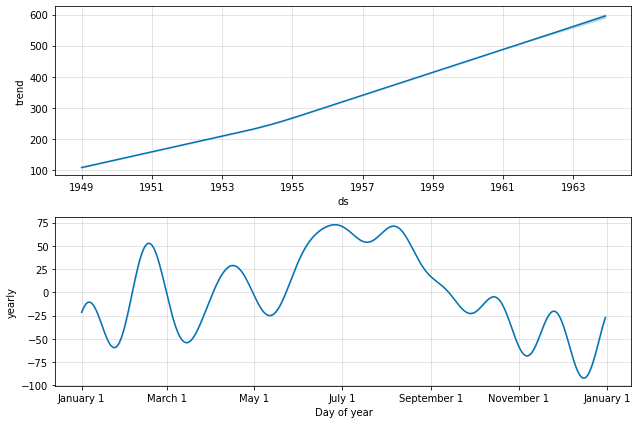

In [29]:
model.plot_components(forecast);

The first plot shows that the monthly volume of airline passengers has been linearly increasing over time. The second plot shows that the most traffic occurs during the holiday months of July and August.

## Adding ChangePoints

Changepoints are the datetime points where the time series have abrupt changes in the trajectory. By default, Prophet adds 25 changepoints to the initial 80% of the data-set.

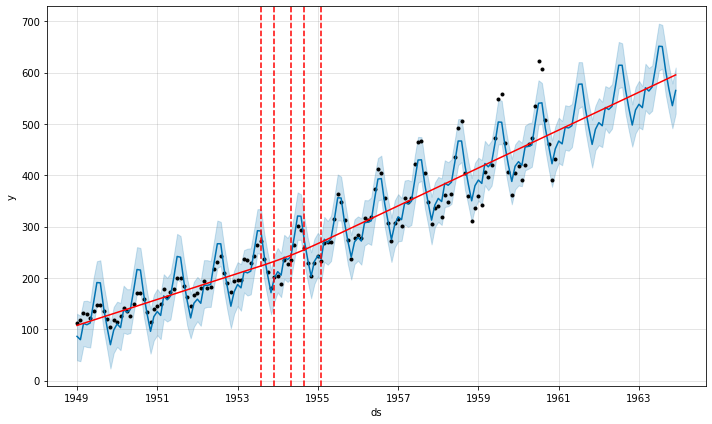

In [30]:
from fbprophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

We can view the dates where the chagepoints occurred.

In [31]:
model.changepoints

5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       401.597   0.000421746        64.054   4.557e-06       0.001      134  LS failed, Hessian reset 
      99       401.642   4.21677e-05       67.6306           1           1      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196       401.937   0.000349209       81.6957   4.708e-06       0.001      327  LS failed, Hessian reset 
     199       401.949   0.000125803       49.5817      0.7287      0.7287      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       401.964   2.88504e-05       37.8741    5.07e-07       0.001      386  LS failed, Hessian reset 
     256       401.969   5.38484e-05       71.9185    6.64e-07       0.001      480  LS failed, Hessian reset 
     299       401.972   8.42827e-08       63.6977      0.7687   

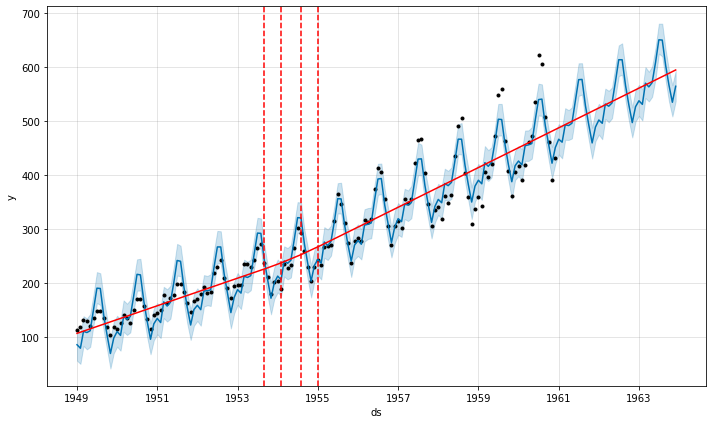

In [32]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       401.788   0.000483264       75.0269   7.033e-06       0.001      153  LS failed, Hessian reset 
      99       401.818   0.000154216       52.6699           1           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       401.974   0.000813212       78.8783    9.44e-06       0.001      300  LS failed, Hessian reset 
     199       402.018   2.98906e-05       74.0796      0.2017           1      318   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        402.03   3.06655e-08       80.3514      0.4438     0.04438      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     302        402.03   5.26597e-09       59.8405      0.1735      0.1735      466   
Optimization terminat

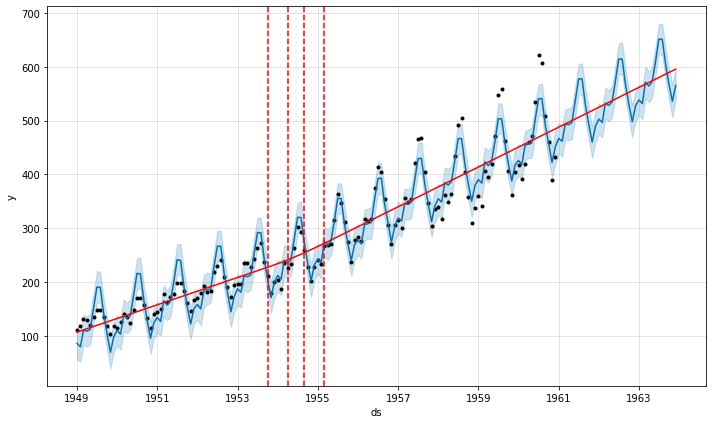

In [33]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

## Adjusting Trend

Prophet allows us to adjust the trend in case there is an overfit or underfit. changepoint_prior_scale helps adjust the strength of the trend. Default value for changepoint_prior_scale is 0.05. Decrease the value to make the trend less flexible. Increase the value of changepoint_prior_scale to make the trend more flexible.
Increasing the changepoint_prior_scale to 0.08 to make the trend flexible.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       403.785   7.95289e-06       34.9417      0.3555      0.3555      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173         403.8   9.57966e-06       31.7151   2.807e-07       0.001      276  LS failed, Hessian reset 
     199       403.801   1.31906e-07        42.139      0.2971      0.2971      315   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       403.801    6.9193e-08       32.2892           1           1      372   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


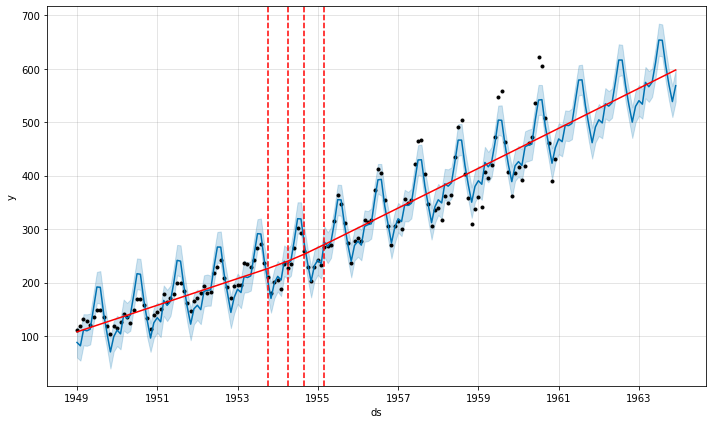

In [34]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

Decreasing the changepoint_prior_scale to 0.001 to make the trend less flexible.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -2.46502             0       147.402       1e-12       0.001       27   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -80.213
Iteration  1. Log joint probability =    167.937. Improved by 248.15.
Iteration  2. Log joint probability =    254.898. Improved by 86.9612.
Iteration  3. Log joint probability =    264.387. Improved by 9.48873.
Iteration  4. Log joint probability =    334.477. Improved by 70.0899.
Iteration  5. Log joint probability =    359.957. Improved by 25.4797.
Iteration  6. Log joint probability =    386.021. Improved by 26.0646.
Iteration  7. Log joint probability =     387.78. Improved by 1.75832.
Iteration  8. Log joint probability =    388.218. Improved by 0.43806.
Iteration  9. Log joint probability =    388.896. I

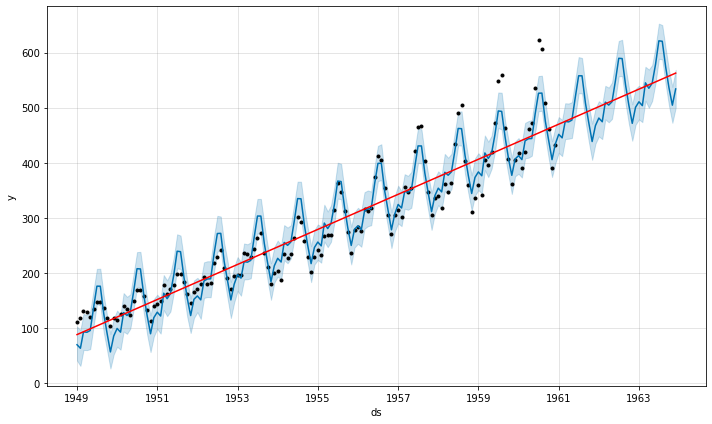

In [35]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)